In [2]:
import os
os.chdir("../")
from data_processing import gamry_eis as geis
from data_processing import arbin_lbt
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload

## EIS Data

In [3]:
leaf_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/Battery Data/Leaf Gamry Data/'
channel_numbers = (1,2,3,4,5,6,7,8)
eis_sweeps = []
for channel_number in channel_numbers:
    eis_sweep = geis.EisSweep(f'channel{channel_number}', 0.5)
    if channel_number < 5:
        eis_sweep.read_DTA_file(leaf_prepath + f'init_gen1_pack2_Chan00{channel_number}_Cycle001_Step013.DTA')
    else:
        eis_sweep.read_DTA_file(leaf_prepath + f'init_gen1_pack1_Chan00{channel_number}_Cycle001_Step013.DTA')
    eis_sweeps.append(eis_sweep)

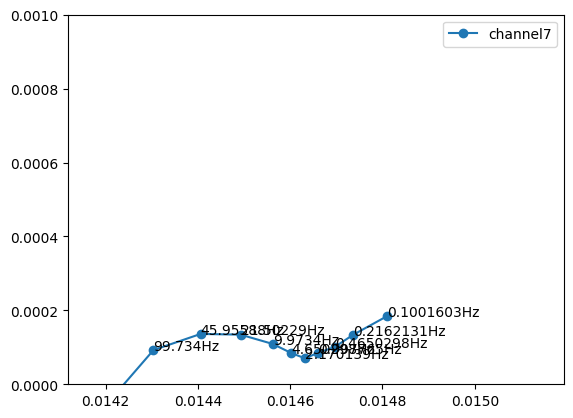

In [22]:
%matplotlib inline
def add_freq_labels(ax, freq, z_real, z_imag):
    for idx, freq in enumerate(freq):
        ax.annotate(f'{freq}Hz', (z_real[idx], z_imag[idx]))

fig = plt.figure()
ax = fig.add_subplot(111)

for sweep in eis_sweeps[-2:-1]:
    ax.plot(sweep.z_real, -1*np.array(sweep.z_imag), label=sweep.name, marker='o')
    add_freq_labels(ax, sweep.freq, sweep.z_real, -1*np.array(sweep.z_imag))
# plt.xlim([0, 0.016])
plt.ylim([0, 0.001])
plt.legend()
plt.show();

In [19]:
folder_path = 'C:/Users/seanb/OneDrive/Documents/PRIMED/Battery Data/Leaf Gamry Data csv/'
for channel_number, sweep in enumerate(eis_sweeps):
    sweep.get_data_as_dataframe().to_csv(
        folder_path +f'init_gen1_pack2_Chan00{channel_number}_Cycle001_Step013.csv',
        index=False
        )

## Cycling Data

In [ ]:
aribin_data_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/Battery Data/Leaf Arbin Data/'
